# HW3

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import math

%matplotlib inline

In [2]:
#Read csv data into pandas DataFrame
market_caps = pd.read_csv('data/hw3.csv')
market_caps.ts = pd.to_datetime(market_caps.ts)
market_caps = market_caps.set_index('ts')

In [3]:
#Check time series
market_caps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2021-12-02 14:00:00 to 2021-12-06 07:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2667 non-null   float64
 1   high       2163 non-null   float64
 2   low        2378 non-null   float64
 3   close      2531 non-null   float64
 4   volume     2667 non-null   float64
 5   volumeUSD  0 non-null      float64
 6   token      2667 non-null   object 
 7   chain      2667 non-null   object 
dtypes: float64(6), object(2)
memory usage: 187.5+ KB


We can see that we have 2667 total entries, but high, low and close have a bunch of nulls.

In [4]:
market_caps['token'].value_counts()

BTC                                   323
COMP                                  322
CRV                                   318
SOL                                   318
USDT                                  314
UNI                                   312
AAVE                                  312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">SOL</span>      16
<span name="tokenName">AAVE</span>     16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

We also have some badly formatted token names.

In [5]:
market_caps.duplicated().sum()

307

We also have some duplicated rows.

<AxesSubplot:xlabel='ts'>

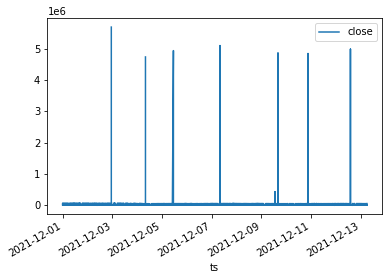

In [6]:
market_caps[['token', 'close']].plot()

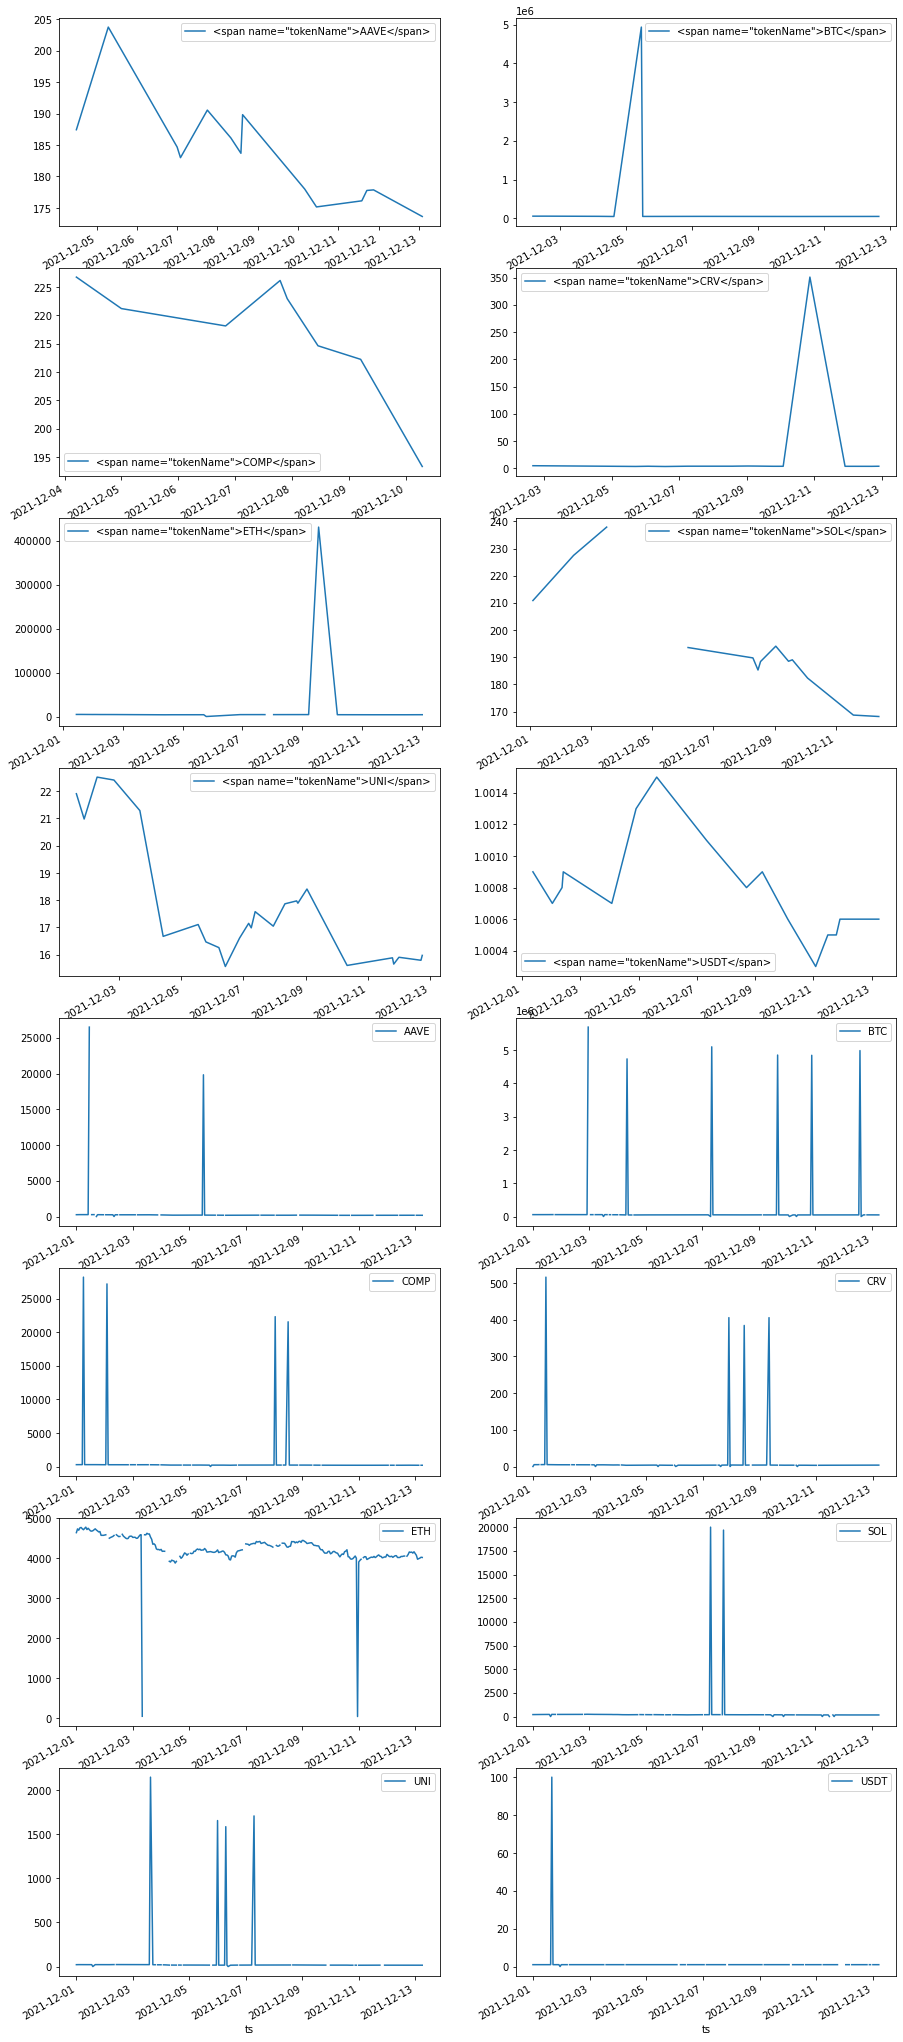

In [7]:
#Plot by token
tokens_in_market_caps = market_caps.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_market_caps.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_market_caps.size / 2)))

idx = 0
for label, market_caps_token in market_caps[['token', 'close']].groupby('token'):
    market_caps_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [8]:
#Remove the duplicated rows
market_caps = market_caps.drop_duplicates()

In [9]:
#Format the token names (Tried string.extract yet didn't work T_T)
market_caps['token'] = market_caps['token'].replace({'<span name="tokenName">UNI</span>': 'UNI', 
                                                     '<span name="tokenName">ETH</span>': 'ETH',
                                                     '<span name="tokenName">USDT</span>': 'USDT',
                                                     '<span name="tokenName">CRV</span>': 'CRV',
                                                     '<span name="tokenName">AAVE</span>': 'AAVE',
                                                     '<span name="tokenName">SOL</span>': 'SOL',
                                                     '<span name="tokenName">BTC</span>': 'BTC',
                                                     '<span name="tokenName">COMP</span>': 'COMP'})

In [10]:
#Filling missing high and low with open since all open values are available
market_caps.loc[market_caps['high'].isnull(), 'high'] = market_caps.loc[market_caps['high'].isnull(), 'open']
market_caps.loc[market_caps['low'].isnull(), 'low'] = market_caps.loc[market_caps['low'].isnull(), 'open']

In [11]:
#Use a heuristic for missing close price as average of high + low of the day
market_caps.loc[market_caps['close'].isnull(), 'close'] = 0.5 * (market_caps.loc[market_caps['close'].isnull(), 'high'] + market_caps.loc[market_caps['close'].isnull(), 'low'])

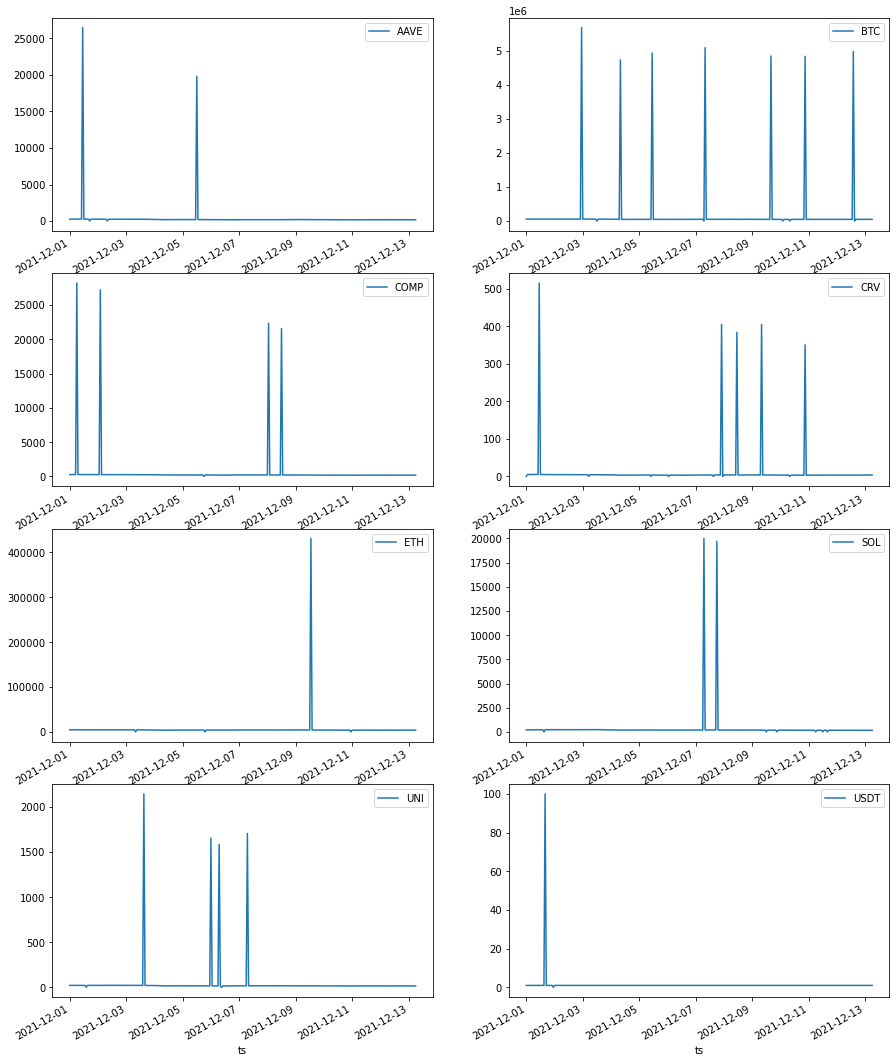

In [12]:
#Plot by token
tokens_in_market_caps = market_caps.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_market_caps.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_market_caps.size / 2)))

idx = 0
for label, market_caps_token in market_caps[['token', 'close']].groupby('token'):
    market_caps_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

Now we have good names, no duplicates and no missing values; However, we still have a lot massive outliers.

In [13]:
#Come up with a heuristic to define an outlier
market_caps.loc[market_caps.close / market_caps.open >= 2]

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-10 21:00:00,3.4600,3.5100,3.4600,351.00,1.080245e+05,NaN,CRV,ETH
2021-12-12 14:00:00,49542.3900,49542.3900,49534.7100,4983812.00,3.426704e+02,NaN,BTC,BTC
2021-12-07 08:00:00,51224.9900,51398.2600,50883.3400,5097338.00,4.433800e+02,NaN,BTC,BTC
2021-12-07 18:00:00,197.0930,197.8000,194.3450,19698.90,6.369084e+04,NaN,SOL,SOL
2021-12-08 01:00:00,223.8500,224.9800,220.3900,22333.00,1.477532e+03,NaN,COMP,ETH
2021-12-08 12:00:00,214.8900,217.1000,212.3800,21568.00,2.372441e+03,NaN,COMP,ETH
2021-12-02 23:00:00,56904.6500,56952.8100,56639.4900,5688883.00,3.821792e+02,NaN,BTC,BTC
2021-12-02 02:00:00,269.7800,272.1200,268.2900,27212.00,4.564180e+02,NaN,COMP,ETH
2021-12-06 07:00:00,16.0391,16.2298,15.8308,1584.74,7.441640e+04,NaN,UNI,ETH


This heuristic looks okay. Use the missing value heuristic to fill them in:

In [14]:
#Replace outliers with average of high and low values
market_caps.loc[market_caps.close / market_caps.open >= 2, 'close'] = 0.5 * (market_caps.loc[market_caps.close / market_caps.open >= 2, 'high'] + market_caps.loc[market_caps.close / market_caps.open >= 2, 'low'])

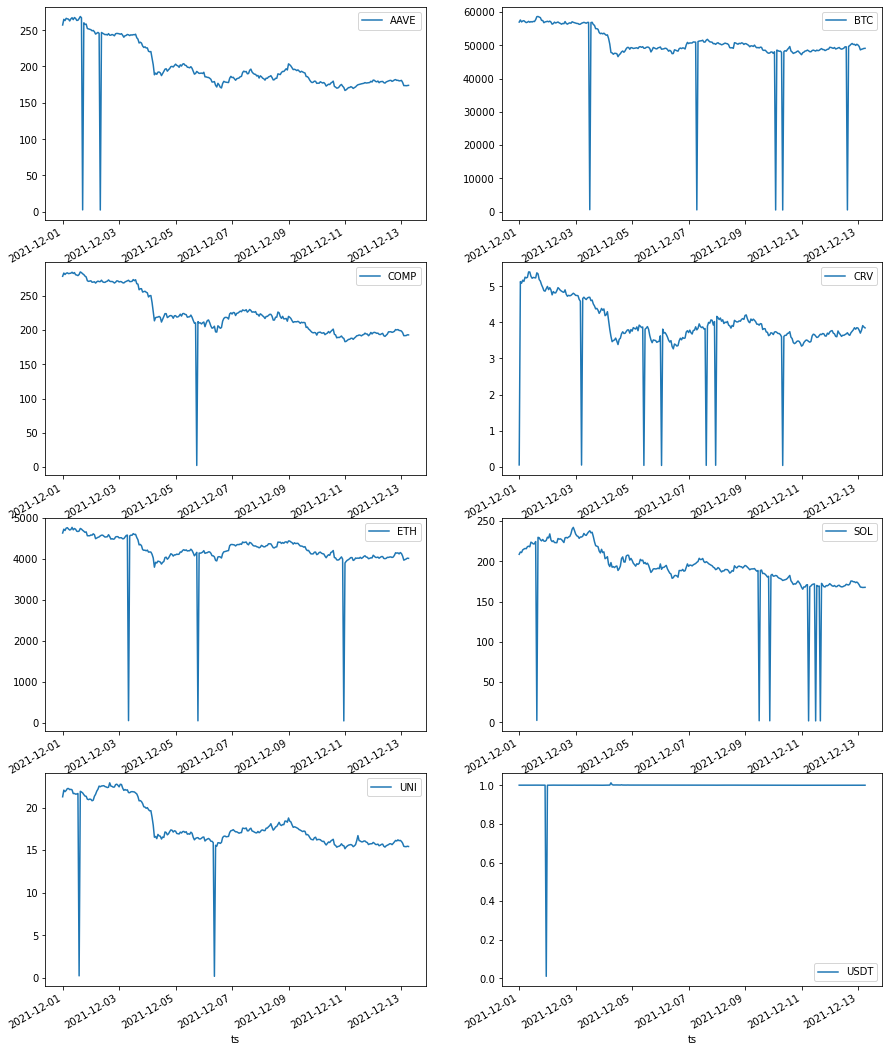

In [15]:
#Plot by token
tokens_in_market_caps = market_caps.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_market_caps.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_market_caps.size / 2)))

idx = 0
for label, market_caps_token in market_caps[['token', 'close']].groupby('token'):
    market_caps_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

Now we see outliers on the other side needs to be removed as well.

In [16]:
#Check outliers on the other side
market_caps.loc[market_caps.open / market_caps.close >= 2]

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-03 12:00:00,56891.7000,57209.7000,56858.0200,570.337400,1.897550e+02,NaN,BTC,BTC
2021-12-07 07:00:00,50941.5000,51272.8300,50936.0500,512.250000,3.124719e+02,NaN,BTC,BTC
2021-12-06 01:00:00,3.6302,3.6365,3.4638,0.035758,4.227913e+05,NaN,CRV,ETH
2021-12-03 08:00:00,4584.3400,4588.0300,4548.0600,45.722700,2.468821e+03,NaN,ETH,ETH
2021-12-02 08:00:00,245.8090,247.5180,245.7290,2.467160,3.166740e+02,NaN,AAVE,ETH
2021-12-10 23:00:00,3996.1700,3996.1700,3953.7700,39.613200,8.379371e+03,NaN,ETH,ETH
2021-12-01 17:00:00,265.2620,265.2620,262.9060,2.632300,9.809190e+02,NaN,AAVE,ETH
2021-12-11 12:00:00,171.8500,172.4100,169.9900,1.700800,1.572705e+04,NaN,SOL,SOL
2021-12-10 08:00:00,3.5900,3.6300,3.5400,0.035700,1.034540e+05,NaN,CRV,ETH


In [17]:
#Replace outliers with average of high and low values
market_caps.loc[market_caps.open / market_caps.close >= 2, 'close'] = 0.5 * (market_caps.loc[market_caps.open / market_caps.close >= 2, 'high'] + market_caps.loc[market_caps.open / market_caps.close >= 2, 'low'])

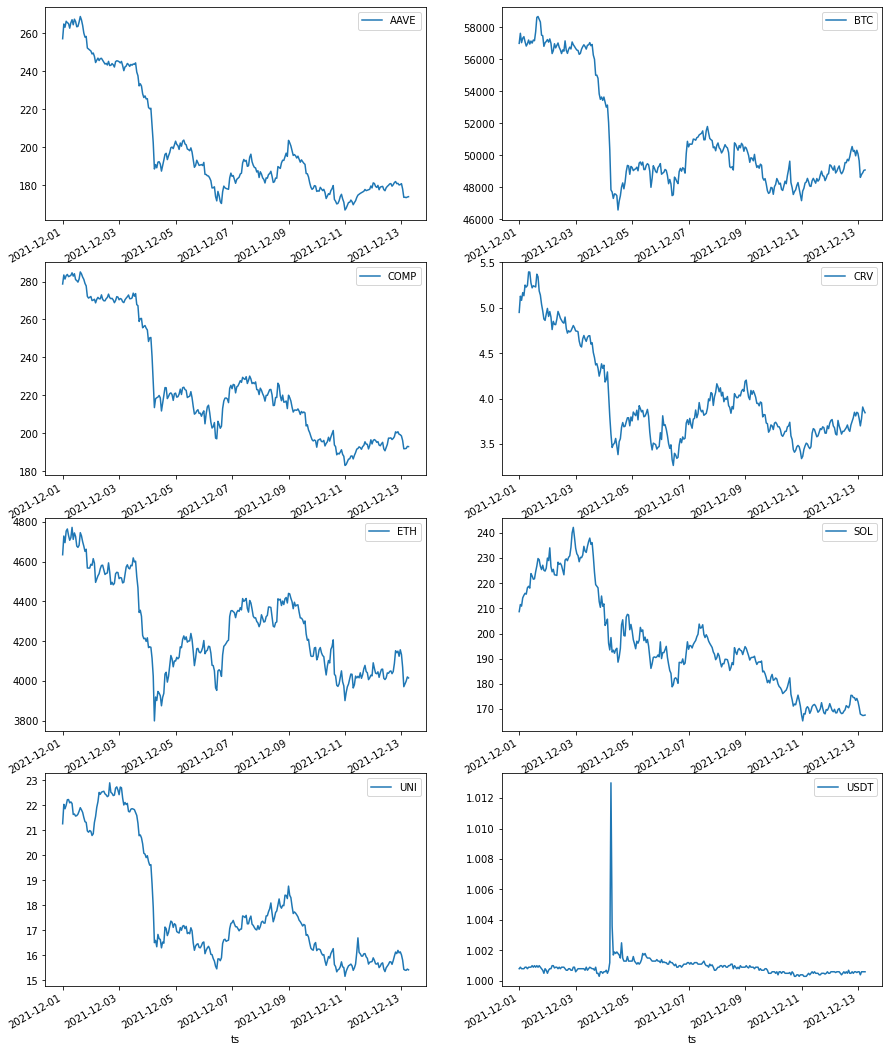

In [18]:
#Plot by token
tokens_in_market_caps = market_caps.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_market_caps.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_market_caps.size / 2)))

idx = 0
for label, market_caps_token in market_caps[['token', 'close']].groupby('token'):
    market_caps_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

Now we have a much cleaner dataset. Calculate missing volueUSD = volume * close.

In [19]:
#Calculate volumeUSD = volume * close
market_caps['volumeUSD'] = market_caps['volume'] * market_caps['close']

In [20]:
#Calculate volumeUSD by chain
market_caps.groupby(['chain'])['volumeUSD'].sum().to_frame()

,volumeUSD
chain,
BTC,1.095893e+10
ETH,1.364762e+10
SOL,4.075514e+09
USDT,1.008247e+09
